In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from optimisation.parallel_cma import CmaesData

In [3]:
folder = 'outcmaes_pmm/18993108/'
df = pd.read_csv(folder + 'fit.dat', sep=' ', usecols=[0,1,2,3,4,5,6,7],
                 names=['iter', 'eval', 'sigma', 'axis ratio', 'bestever', 'best', 'median', 'worst'], skiprows=1)

In [4]:
df.head()

,iter,eval,sigma,axis ratio,bestever,best,median,worst
0,1,56,0.564538,1.000040,0.014416,0.014416,0.121099,0.376646
1,2,112,0.522194,1.675550,0.014416,0.024608,0.098994,0.386683
2,3,168,0.493431,2.245790,0.014416,0.024710,0.093094,0.360671
3,4,224,0.417574,3.033061,0.009198,0.009198,0.076911,0.291273
4,5,280,0.435564,4.183169,0.009198,0.012094,0.063095,0.145556


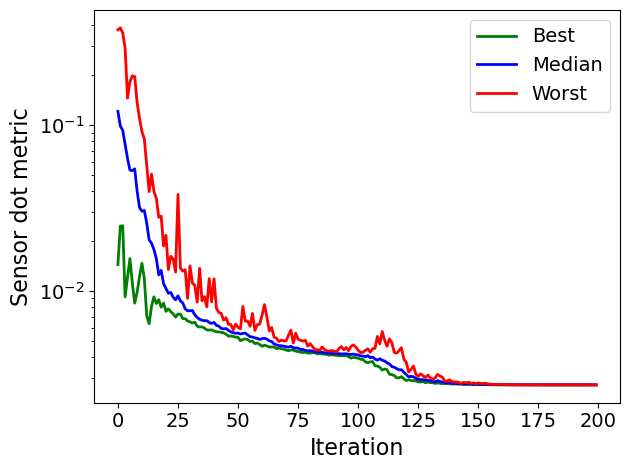

In [11]:
plt.figure()
plt.plot(df['best'], lw=2, color='g', label='Best')
plt.plot(df['median'], lw=2, color='b', label='Median')
plt.plot(df['worst'], lw=2, color='r', label='Worst')
plt.yscale('log')
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Sensor dot metric', fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('figures/three_site_max_loss.svg', format='svg')
plt.show()

In [6]:
df2 = pd.read_csv(folder + 'xmean.dat', sep=' ', usecols=[0,1,5,6,7, 8, 9],
                 names=['iter', 'eval', 'x1', 'x2', 'x3', 'x4', 'x5'], skiprows=1)

d = []
d.insert(0, {'iter':0, 'eval':0, 'x1':0, 'x2':0, 'x3':0, 'x4':0, 'x5':0})

df2 = pd.concat([pd.DataFrame(d), df2], ignore_index=True)

In [7]:
df2.head()

,iter,eval,x1,x2,x3,x4,x5
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,56,-0.328919,0.135096,-0.178589,-0.080329,-0.051601
2,2,112,-0.328890,-0.011316,-0.181261,-0.067322,-0.194782
3,3,168,-0.245826,-0.074096,-0.227520,-0.222910,-0.275579
4,4,224,-0.221789,0.016884,-0.193160,-0.155440,-0.225747


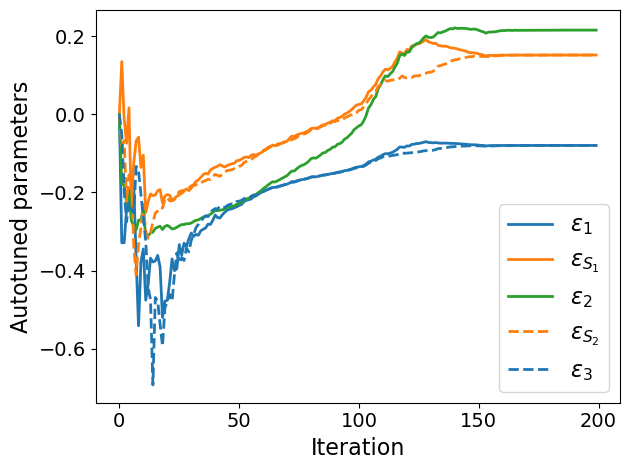

In [12]:
nits = 200

plt.figure()
plt.plot(np.arange(0,nits), df2['x1'][:nits], color='C0', lw=2, label=r'$\varepsilon_{1}$')
plt.plot(np.arange(0,nits), df2['x2'][:nits], color='C1', lw=2, label=r'$\varepsilon_{S_1}$')
plt.plot(np.arange(0,nits), df2['x3'][:nits], color='C2', lw=2, label=r'$\varepsilon_{2}$')
plt.plot(np.arange(0,nits), df2['x4'][:nits], color='C1', lw=2, label=r'$\varepsilon_{S_2}$', ls='--')
plt.plot(np.arange(0,nits), df2['x5'][:nits], color='C0', lw=2, label=r'$\varepsilon_{3}$', ls='--')
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Autotuned parameters', fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.legend(fontsize=16)
plt.savefig('figures/three_site_learning_prada_loss_fail.svg', format='svg')
plt.show()

## Energy split and MP

In [13]:
dataloader = CmaesData()
datadict = dataloader.load('outcmaes_pmm/18993108/')

In [16]:
mu_MP = []
mu_dE = []

gen = 0
arr_mp = []
arr_dE = []

for i in range(len(datadict)):
    
    if datadict[i]['iteration'] > gen or i == len(datadict)-1:
        
        mu_MP.append(np.mean(np.array(arr_mp)))
        mu_dE.append(np.mean(np.array(arr_dE)))
        arr_mp = []
        arr_dE = []
        gen+=1
    else:
        arr_mp.append(datadict[i]['MP'])
        arr_dE.append(datadict[i]['dE'])
        
mu_MP = np.array(mu_MP)
mu_dE = np.array(mu_dE)

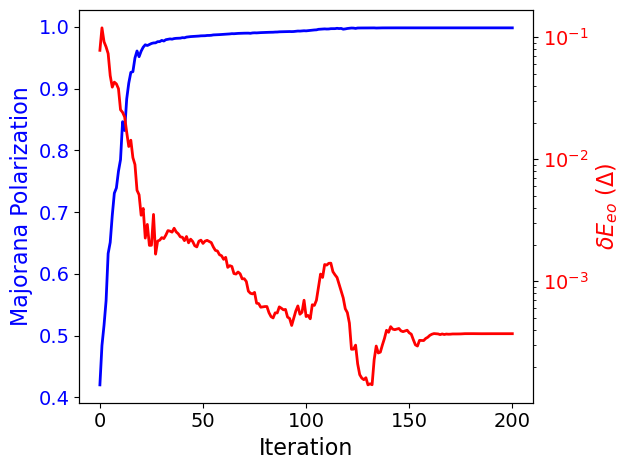

In [18]:
fig, ax = plt.subplots()
ax1 = ax.plot(mu_MP, color='b', lw=2)
ax2 = ax.twinx()
ax2.plot(mu_dE, color='r', lw=2)
ax2.set_yscale('log')
ax.set_xlabel('Iteration', fontsize=16)
ax.set_ylabel('Majorana Polarization', fontsize=16, color='b')
ax2.set_ylabel(r'$\delta E_{eo}$ ($\Delta$)', fontsize=16, color='r')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14, labelcolor='b')
ax2.tick_params(axis='y',labelsize=14, labelcolor='r')
fig.tight_layout()
plt.savefig('figures/three_site_MP_dE_prada_loss_fail.svg', format='svg')
plt.show()